# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import numpy as np
import pandas as pd




# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
df = pd.read_csv('Employee.csv')

df.columns

Index(['Name', 'Department', 'Education', 'Gender', 'Title', 'Years',
       'Salary'],
      dtype='object')

#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# your answer 
df1 = df.groupby('Department')['Salary'].mean().reset_index()

display(df1)


,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [4]:
# your answer 
pt = pd.pivot_table(df, values='Salary', index='Department', aggfunc='mean')

display(pt)


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
# your answer here
pt = pd.pivot_table(df, values='Salary', index=('Department', 'Title'), aggfunc='mean')

display(pt)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
pt = pd.pivot_table(df, values=('Salary', 'Years'), index=('Title'), aggfunc='mean')

display(pt)

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [7]:
# your answer here
pt = pd.pivot_table(df, values=('Salary', 'Name'), index=('Department', 'Title'), aggfunc=['mean', 'size'])
pt.columns = ['Mean Salary', 'Number of Employees']
display(pt)




C:\Users\anabe\AppData\Local\Temp\ipykernel_15736\2213752789.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pt = pd.pivot_table(df, values=('Salary', 'Name'), index=('Department', 'Title'), aggfunc=['mean', 'size'])


Mean Salary  Number of Employees
Department Title                                      
HR         VP                70.0                    1
           analyst           32.5                    2
IT         VP                70.0                    1
           analyst           32.5                    2
           associate         60.0                    1
Sales      associate         55.0                    2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [8]:
# your answer here
pt = pd.pivot_table(df, values='Salary', index=['Department', 'Title'], aggfunc=['median', 'min', 'max', 'std'])
pt.columns = ['Median Salary', 'Minimum Salary', 'Maximum Salary', 'Salary Standard Deviation']
display(pt)

#Can´t calculate standard deviation when there is only one entry, therefore output is NaN.


Median Salary  Minimum Salary  Maximum Salary  \
Department Title                                                      
HR         VP                  70.0              70              70   
           analyst             32.5              30              35   
IT         VP                  70.0              70              70   
           analyst             32.5              30              35   
           associate           60.0              60              60   
Sales      associate           55.0              55              55   

                      Salary Standard Deviation  
Department Title                                 
HR         VP                               NaN  
           analyst                     3.535534  
IT         VP                               NaN  
           analyst                     3.535534  
           associate                        NaN  
Sales      associate                   0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
# your answer here
pt = pt.fillna(0)
pt


Median Salary  Minimum Salary  Maximum Salary  \
Department Title                                                      
HR         VP                  70.0              70              70   
           analyst             32.5              30              35   
IT         VP                  70.0              70              70   
           analyst             32.5              30              35   
           associate           60.0              60              60   
Sales      associate           55.0              55              55   

                      Salary Standard Deviation  
Department Title                                 
HR         VP                          0.000000  
           analyst                     3.535534  
IT         VP                          0.000000  
           analyst                     3.535534  
           associate                   0.000000  
Sales      associate                   0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
# your answer here
pt = pd.pivot_table(df, values=('Salary'), index=('Department'), aggfunc=('sum', 'size'))
pt.columns = ['Number of Employees', 'Mean Salary']
display(pt)


,Number of Employees,Mean Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [11]:
# your answer here
pt = pd.pivot_table(df, values=['Salary', 'Years'], index=['Department', 'Title'], aggfunc={'Salary': 'mean', 'Years': 'sum'})
pt.columns = ['Mean Salary', 'Years Count']
display(pt)


Mean Salary  Years Count
Department Title                              
HR         VP                70.0            8
           analyst           32.5            6
IT         VP                70.0            8
           analyst           32.5            3
           associate         60.0            7
Sales      associate         55.0            5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [14]:
# your answer here
df2 = pd.read_csv('Fitbit.csv')

df2.columns


Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes'],
      dtype='object')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [15]:
# your answer here
df2.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [16]:
# your answer here
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [17]:
# your answer here
corr = df2[['Minutes Very Active', 'Steps']].corr()
corr


,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

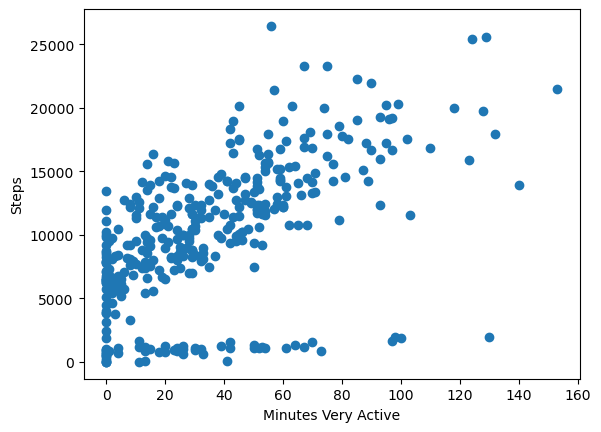

In [18]:
#Import library
import matplotlib.pyplot as plt

#Fetches columns
x = df2['Minutes Very Active']
y = df2['Steps']

#Creates plot
plt.scatter(x, y)
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')

plt.show()


#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here
#I´d say both columns are for some cases correlated, although not for all which eventually makes the correlation decrease.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [20]:
# your answer here
corr = df2[['Minutes Sedentary', 'Steps']].corr()
corr


,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

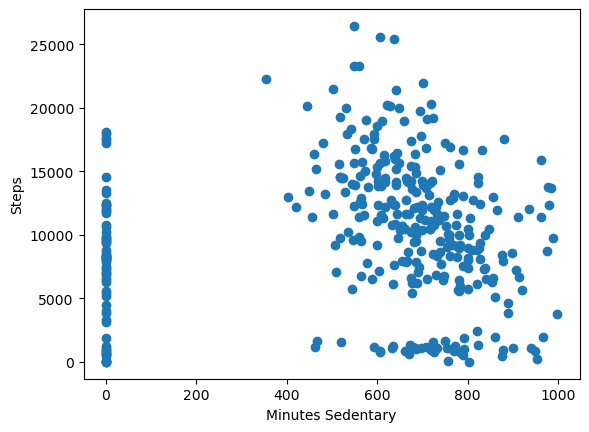

In [21]:
# your answer here
#Fetches columns
x = df2['Minutes Sedentary']
y = df2['Steps']

#Creates plot
plt.scatter(x, y)
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')

plt.show()


In [22]:
# Your comment here
#There is no correlation whatsoever.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [23]:
# your answer here
corr = df2[['MinutesOfSleep', 'Steps']].corr()
corr

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

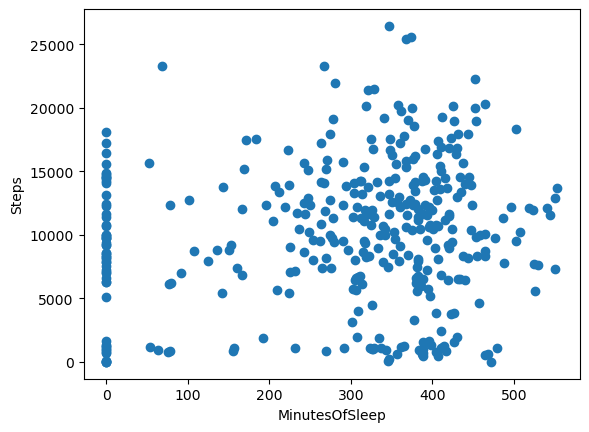

In [24]:
# your answer here
#Fetches columns
x = df2['MinutesOfSleep']
y = df2['Steps']

#Creates plot
plt.scatter(x, y)
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')

plt.show()

In [25]:
#There is no correlation either for this case.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [26]:
# your answer here

In [27]:
df3 = df2[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]
df3

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


In [28]:
cor_fit=df3.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [29]:
# your answer here
cor = df3.corr()['Steps'].sort_values(ascending=False)
cor

#Minutes Very Active is the most correlated feature to Steps.

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [37]:
# your answer here
time_grades=pd.read_csv('Time_Grades.csv')

time_grades.columns

Index(['Name', 'Study time', 'Grade'], dtype='object')

#### Show visually the frequency distribution of the time_grades dataset.

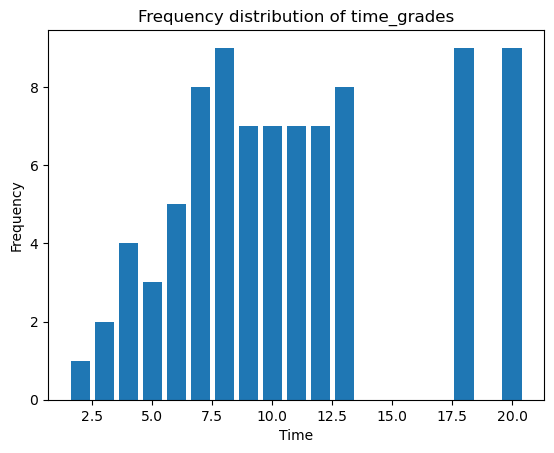

In [40]:
# your answer here
plt.bar(time_grades['Study time'], time_grades['Grade'], align='center')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Frequency distribution of time_grades')
plt.show()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [48]:
# your answer 
#Pearson
pearson_cor = time_grades['Study time'].corr(time_grades['Grade'], method='pearson')
pearson_cor


0.7980456073578858

In [47]:
## your answer
#Spearman
spearman_cor = time_grades['Study time'].corr(time_grades['Grade'], method='spearman')
pearson_cor


0.7980456073578858

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Y')

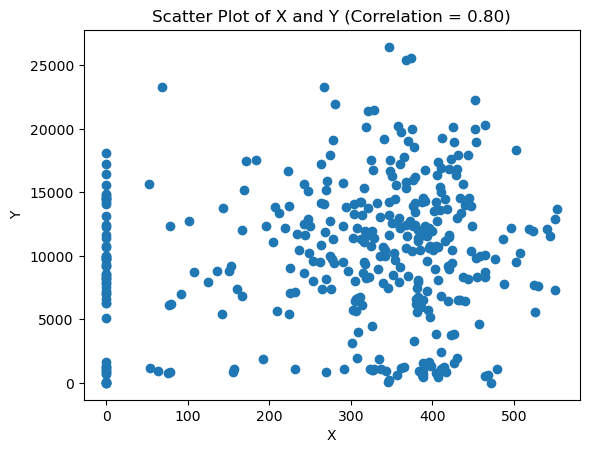

In [44]:
# your answer here
plt.scatter(x, y)
plt.title(f"Scatter Plot of X and Y (Correlation = {pearson_cor:.2f})")
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'Y')

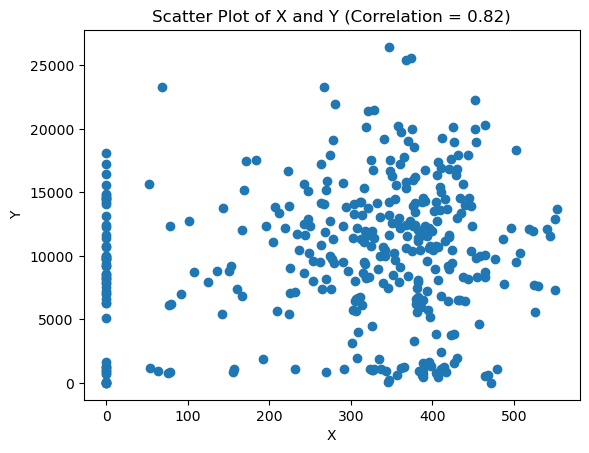

In [46]:
#your comment here
plt.scatter(x, y)
plt.title(f"Scatter Plot of X and Y (Correlation = {spearman_cor:.2f})")
plt.xlabel("X")
plt.ylabel("Y")

In [ ]:
#There is certainly a correlation for both methods.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [36]:
#your comment here
#Pearson measures the linear relationship between to continuos variables whereas Spearman measures the monotonic relationship between two variables.